<h2>Median Filtering </h2>

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


<h3>Read Image</h3>

In [2]:
image_path = '../images/lane.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
noisy_image = image_rgb.copy()

<h3>Add salt and pepper Noise and Display</h3>

In [3]:
# noise_prob = 0.5
# noise = np.random.rand(noisy_image.shape[0], noisy_image.shape[1])

# noisy_image[noise < noise_prob/2] = 0
# noisy_image[noise > 1 - noise_prob/2] = 255

# plt.figure()
# plt.imshow(noisy_image)

# plt.show()



<h3>Apply Median Filter</h3>

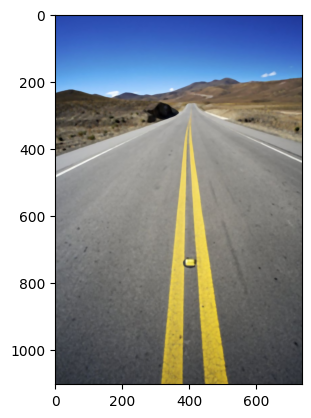

In [4]:
median_filter = cv2.medianBlur(noisy_image, 7)
plt.figure()
plt.imshow(median_filter)

plt.show()

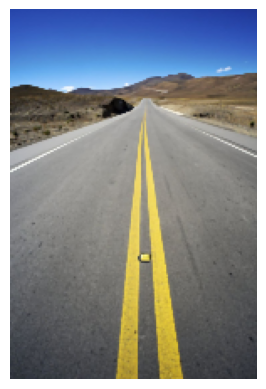

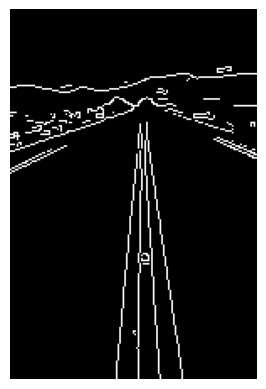

In [ ]:

height, width, _ = median_filter.shape
scale = 1/5

height_scale = int(height * scale)
width_scale = int(width * scale)
img = cv2.resize(median_filter, (width_scale, height_scale), interpolation=cv2.INTER_LINEAR)

canny_edge = cv2.Canny(img, 200, 255)

plt.figure()
plt.imshow(canny_edge, cmap='gray')  
plt.axis('off')  
plt.show()


<h3>ROI</h3>

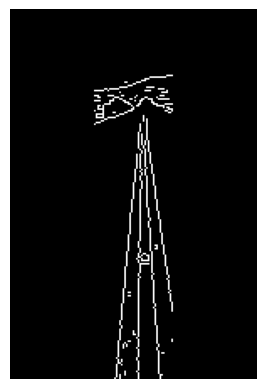

In [21]:
mask = np.zeros_like(canny_edge)


middle_width = width_scale // 3 


left_mask = np.array([[(0, 0), (0, height_scale), 
                       (width_scale // 2 - middle_width // 2, height_scale), 
                       (width_scale // 2 - middle_width // 2, 0)]], dtype=np.int32)

right_mask = np.array([[(width_scale, 0), (width_scale, height_scale), 
                        (width_scale // 2 + middle_width // 2, height_scale), 
                        (width_scale // 2 + middle_width // 2, 0)]], dtype=np.int32)


cv2.fillPoly(mask, left_mask, 255)
cv2.fillPoly(mask, right_mask, 255)


mask = cv2.bitwise_not(mask)

masked_edges = cv2.bitwise_and(canny_edge, mask)

# plt.figure()
# plt.imshow(mask, cmap='gray')  
# plt.axis('off')  
# plt.show()

plt.figure()
plt.imshow(masked_edges, cmap='gray')  
plt.axis('off')  
plt.show()


<h3>Masked Image</h3>

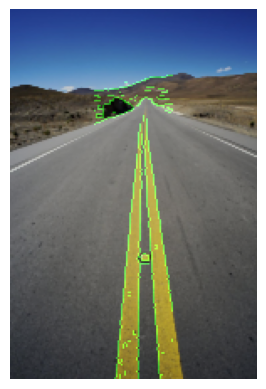

In [47]:
edges_colored = np.zeros_like(img)  
edges_colored[:, :, 1] = masked_edges 


highlighted = cv2.addWeighted(img, 0.8, edges_colored, 0.5, 0)

plt.figure()
plt.imshow(highlighted)
plt.axis('off')
plt.show()
